In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#read dataset
ds=pd.read_csv('airpassenger.csv')

In [4]:
#to get first 5 records
ds.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
#to  get data type of column
ds.dtypes

Month          object
#Passengers     int64
dtype: object

In [8]:
#to convert the datatype to datetime
ds=pd.read_csv('airpassenger.csv',parse_dates=['Month'])

In [9]:
ds.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [10]:
ds.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
#to work with time-series analysis we should treat time as index
#time cannot be variable it has to be index
ds=pd.read_csv('airpassenger.csv',parse_dates=['Month'],index_col='Month')

In [12]:
ds.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
#to obtain data for specific time period
ds['1949-01-01' : '1950-01-01']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [14]:
#to get number of passengers for specific date
ds.loc['1949-06-01']

#Passengers    135
Name: 1949-06-01 00:00:00, dtype: int64

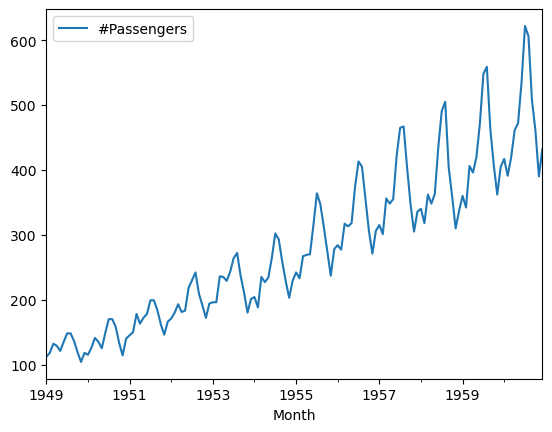

In [24]:
#plot the time series
ds.plot()
plt.show()

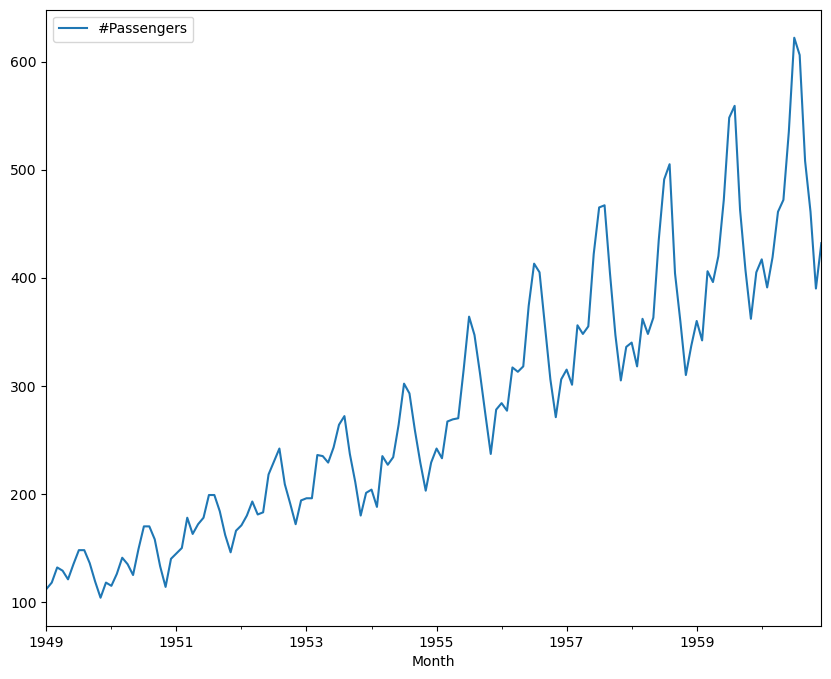

In [26]:
#to increase figure size
from pylab import rcParams
rcParams['figure.figsize']=10,8
ds.plot()
plt.show()

In [27]:
#we can see trend that is upward
#but seasonality is not constant

In [28]:
#as seasonality is not constant and changing with trends...we will use multiplicative model

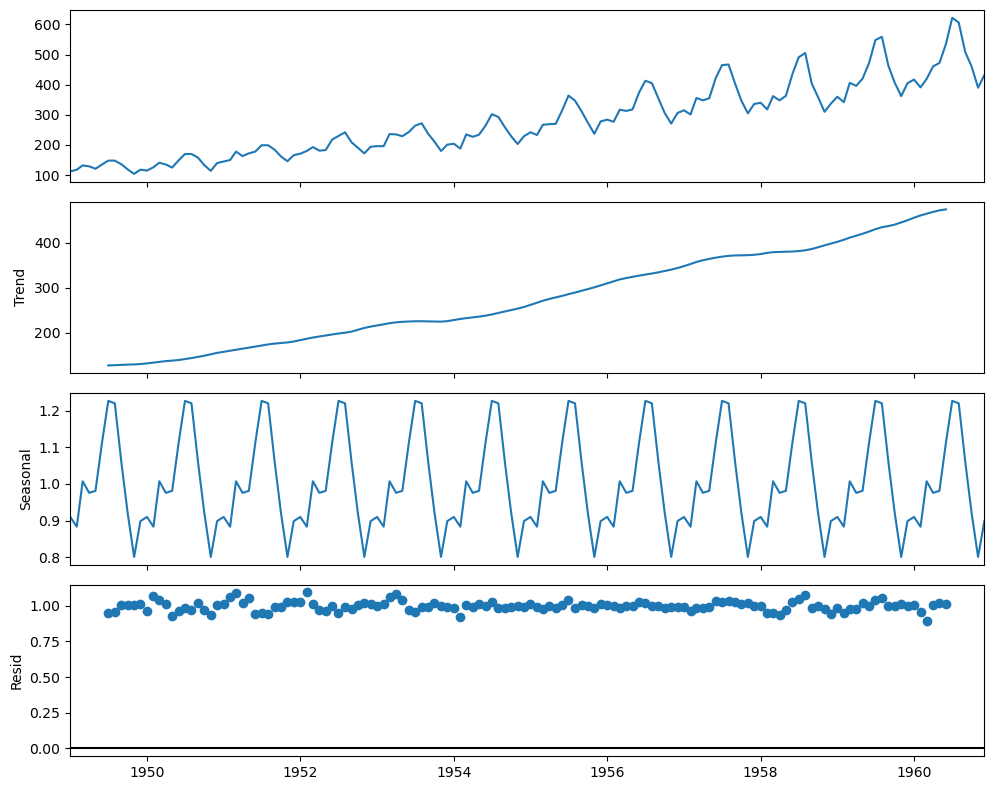

In [30]:
#decompose time series multiplicatively
ds_ml_decompose=seasonal_decompose(ds,model='multiplicative')
ds_ml_decompose.plot()
plt.show()

In [31]:
#repeating pattern in seasonality is observed
#ist graph will show that seasonality is channging according to trend

In [32]:
#we can convert multiplicative model to additive model
#this can be done by taking log
#we can make seasonality constatnt by this

In [38]:
#get copy of dataset
ds_copy=ds.copy()

In [39]:
ds_copy['#Passengers']=np.log(ds)

In [40]:
ds_copy.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


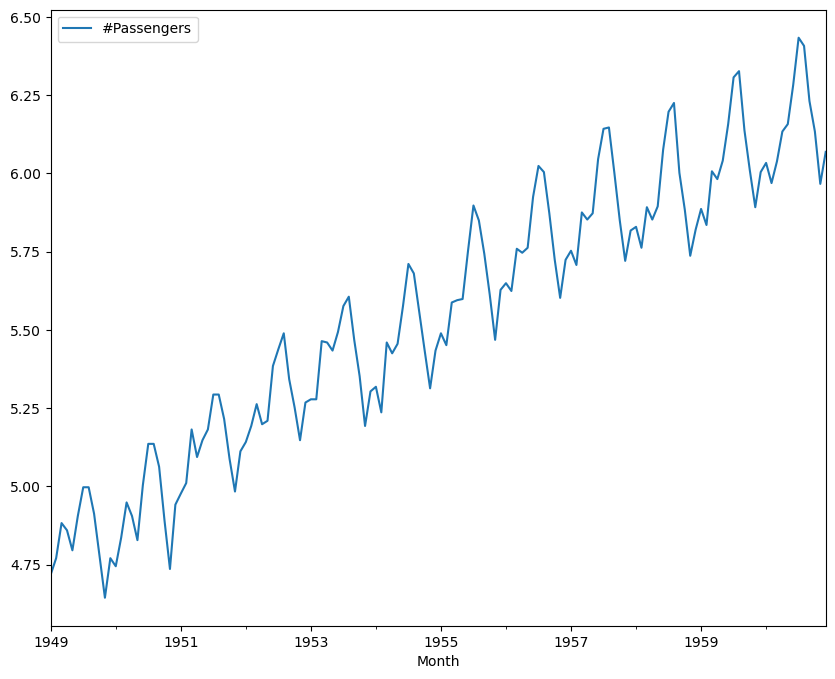

In [41]:
#plot updated dataset
ds_copy.plot()
plt.show()

In [42]:
#variation in seasonal pattern is lowered

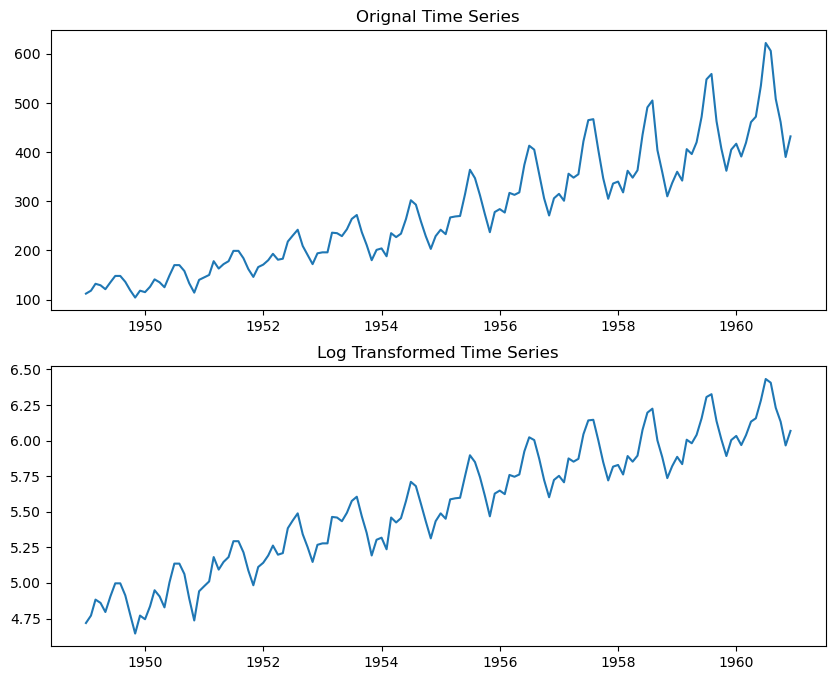

In [44]:
#to compare with orignal
plt.subplot(2,1,1)
plt.title("Orignal Time Series")
plt.plot(ds)

plt.subplot(2,1,2)
plt.title("Log Transformed Time Series")
plt.plot(ds_copy)

plt.show()

In [45]:
#to convert additive to multiplicative take exponential
ds_add_to_mul=np.exp(ds_copy)

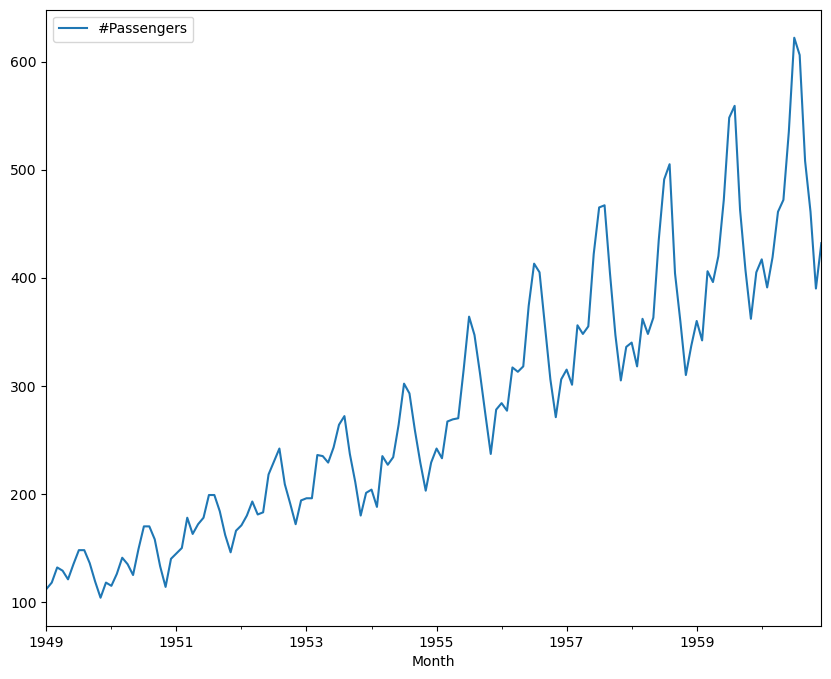

In [46]:
#ploting converted time series
ds_add_to_mul.plot()
plt.show()

In [47]:
#it gets back to orignal multiplicative time series on conversion